### Date: 06/02/2023

#### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
print("numpy version: ", np.__version__)
print("pandas version: ", pd.__version__)
print("sklearn version: ", sklearn.__version__)

# numpy version:  1.24.1
# pandas version:  1.5.2
# sklearn version:  1.2.1

numpy version:  1.24.1
pandas version:  1.5.2
sklearn version:  1.2.1


#### Data Collection and Processing

In [3]:
# loading the csv data to a Pandas DataFrame

df = pd.read_csv('dataset/heart.csv')

In [4]:
# print first 5 rows of the dataset

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# print last 5 rows of the dataset

df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# number of rows and columns in the dataset

df.shape

(303, 14)

In [7]:
# getting some info about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# checking for missing values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# statistical measures about the data

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# checking the distribution of Target Variable

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

#### Splitting the Features and Target

In [11]:
X = df.drop(columns='target', axis=1)

Y = df['target']

In [12]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [13]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

#### Splitting the Data into Training data & Test Data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=21)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


#### Model Training

In [16]:
model = LogisticRegression(max_iter=1000)

In [17]:
# training the LogisticRegression model with Training data

model.fit(X=X_train, y=Y_train)

LogisticRegression(max_iter=1000)

#### Model Evaluation

**Accuracy Score**

In [18]:
# accuracy on training data

y_pred = model.predict(X=X_train)

training_data_accuracy = accuracy_score(y_true=Y_train, y_pred=y_pred)

print(training_data_accuracy)

0.8636363636363636


In [19]:
print('Accuracy on Training data : ', round(training_data_accuracy * 100, 2), '%')

Accuracy on Training data :  86.36 %


In [20]:
# accuracy on test data

X_test_prediction = model.predict(X=X_test)

test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print(test_data_accuracy)

0.8360655737704918


In [21]:
print('Accuracy on Test data : ', round(test_data_accuracy * 100, 2), '%')

Accuracy on Test data :  83.61 %


**Confuaion Matrix**

In [22]:
cf_matrix = confusion_matrix(y_true=Y_test, y_pred=X_test_prediction)

print(cf_matrix)

[[20  8]
 [ 2 31]]


In [23]:
tn, fp, fn, tp = cf_matrix.ravel()

print(tn, fp, fn, tp)

20 8 2 31


<AxesSubplot: >

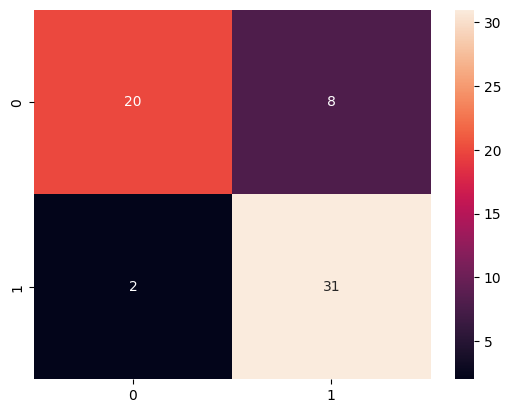

In [24]:
import seaborn as sns

sns.heatmap(cf_matrix, annot=True)

confusion matrix for multi class classification: https://colab.research.google.com/drive/17FViiMJbJXQ5s9GOW94emoHcCKUcYr3l?usp=sharing